# Data Visualization Boot Camp: Visualization Block 3 - Fitness Tracking: Analyzing Activity Levels and Health Metrics

Welcome back! While Matplotlib is powerful, it can sometimes require a lot of code for common statistical plots or to achieve a polished look. Enter **Seaborn**! Seaborn is a higher-level data visualization library built on Matplotlib that provides a more convenient and aesthetically pleasing way to create various statistical plots, especially for analyzing **fitness tracking data** and **personal health metrics**.

## 3.1 Why Seaborn for Fitness Data?

Seaborn is particularly useful for analyzing personal fitness data due to:
* **Beautiful Defaults:** Plots look professional with minimal effort.
* **Simpler Syntax:** Easier to create complex plots like daily trends, distributions of activities, or comparisons between workout types.
* **DataFrame Integration:** Works directly with Pandas DataFrames, letting you refer to metrics like `Steps` or `CaloriesBurned` by name.
* **Statistical Orientation:** Designed for statistical plots, making it easy to visualize variability and comparisons between different activities or days.

First, let's import Seaborn, commonly aliased as `sns`, along with Matplotlib and Pandas:


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # Import Seaborn!
import numpy as np # For potential use (e.g., NaN handling or advanced data generation)
%matplotlib inline

print("Matplotlib, Pandas, NumPy, and Seaborn imported successfully!")

/Users/argonneed/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Matplotlib, Pandas, NumPy, and Seaborn imported successfully!


We'll use a hypothetical `fitness_data.csv` representing daily activity levels and health metrics. Please create this file in the same directory as your notebook with the following content:
```csv
Date,ActivityType,Duration_minutes,Steps,CaloriesBurned,HeartRateAvg_bpm,SleepHours,Hydration_L
2024-05-01,Walking,30,5500,250,95,7.5,2.0
2024-05-01,Strength,45,1200,300,110,7.5,2.2
2024-05-02,Running,40,7800,450,135,6.8,2.5
2024-05-02,Yoga,60,800,150,80,6.8,1.8
2024-05-03,Walking,60,8200,380,105,7.2,2.1
2024-05-03,Strength,30,1000,200,100,7.2,1.9
2024-05-04,Running,35,6500,380,128,8.0,2.3
2024-05-04,Rest,0,500,100,70,8.0,1.5
2024-05-05,Cycling,50,6000,400,120,7.0,2.4
2024-05-05,Yoga,45,700,120,85,7.0,1.7
2024-05-06,Walking,45,6800,320,100,7.1,2.0
2024-05-07,Strength,60,1500,450,115,7.8,2.2
2024-05-08,Running,30,5000,300,125,6.5,2.1
```
Now, let's load this data:


In [8]:
try:
    fitness_df = pd.read_csv('data/fitness_data.csv')
    # Convert 'Date' column to datetime objects for potential time-series plots
    fitness_df['Date'] = pd.to_datetime(fitness_df['Date'])
    print("Fitness Data DataFrame loaded successfully:")
    print(fitness_df.head())
except FileNotFoundError:
    print("Error: 'fitness_data.csv' not found. Please create it or ensure it's in the correct directory.")
    # Dummy DataFrame if file not found
    data = {
        'Date': pd.to_datetime(['2024-05-01', '2024-05-01', '2024-05-02', '2024-05-02']),
        'ActivityType': ['Walking', 'Strength', 'Running', 'Yoga'],
        'Duration_minutes': [30, 45, 40, 60],
        'Steps': [5500, 1200, 7800, 800],
        'CaloriesBurned': [250, 300, 450, 150],
        'HeartRateAvg_bpm': [95, 110, 135, 80],
        'SleepHours': [7.5, 7.5, 6.8, 6.8],
        'Hydration_L': [2.0, 2.2, 2.5, 1.8]
    }
    fitness_df = pd.DataFrame(data)
    print("\nUsing a dummy DataFrame for demonstration.")
    print(fitness_df.head())

Fitness Data DataFrame loaded successfully:
        Date ActivityType  Duration_minutes  Steps  CaloriesBurned  \
0 2024-05-01      Walking                30   5500             250   
1 2024-05-01     Strength                45   1200             300   
2 2024-05-02      Running                40   7800             450   
3 2024-05-02         Yoga                60    800             150   
4 2024-05-03      Walking                60   8200             380   

   HeartRateAvg_bpm  SleepHours  Hydration_L  
0                95         7.5          2.0  
1               110         7.5          2.2  
2               135         6.8          2.5  
3                80         6.8          1.8  
4               105         7.2          2.1  


## 3.2 Relationship Plots: Steps vs. Calories, Heart Rate Trends

Seaborn is excellent for visualizing relationships between continuous variables, such as how steps taken relate to calories burned, or heart rate changes over time/activity.

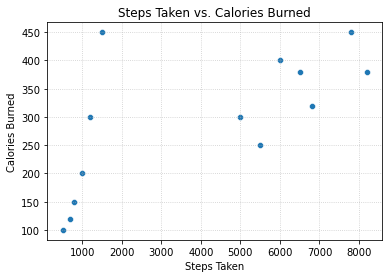

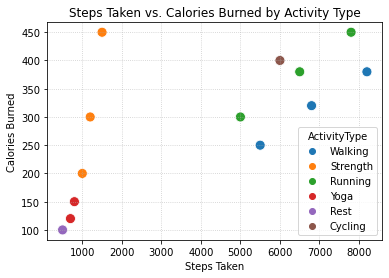

In [9]:
# Scatter plot for Steps vs. Calories Burned
sns.scatterplot(x='Steps', y='CaloriesBurned', data=fitness_df)
plt.title('Steps Taken vs. Calories Burned')
plt.xlabel('Steps Taken')
plt.ylabel('Calories Burned')
plt.grid(True, linestyle=':', alpha=0.7)
plt.show()

# Enhance: color points by 'ActivityType' to see differences
sns.scatterplot(x='Steps', y='CaloriesBurned', hue='ActivityType', data=fitness_df, s=100) # s for size
plt.title('Steps Taken vs. Calories Burned by Activity Type')
plt.xlabel('Steps Taken')
plt.ylabel('Calories Burned')
plt.grid(True, linestyle=':', alpha=0.7)
plt.show()

### `sns.lineplot()` for Trends Over Time or Duration

For trends, especially with multiple measurements or daily logging, `sns.lineplot()` can be very effective, showing patterns in metrics like heart rate or sleep over time.

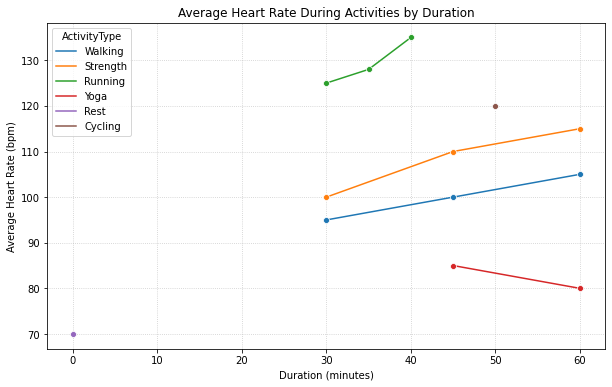

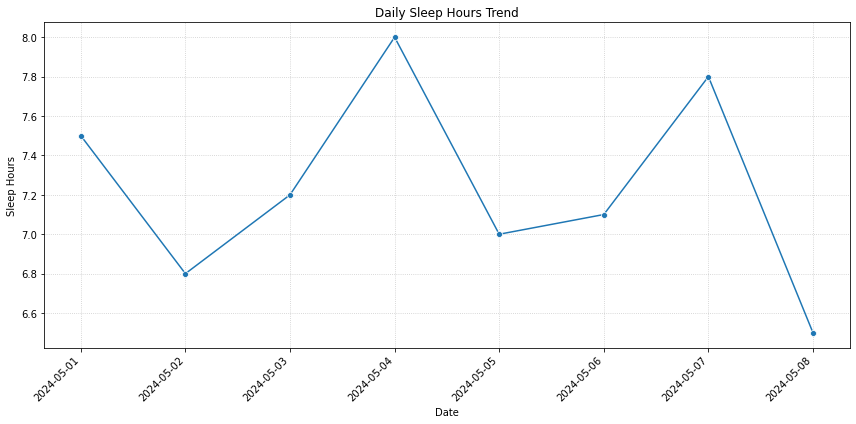

In [10]:
# Plot HeartRateAvg_bpm vs. Duration_minutes, colored by ActivityType
plt.figure(figsize=(10, 6))
sns.lineplot(x='Duration_minutes', y='HeartRateAvg_bpm', hue='ActivityType', data=fitness_df, marker='o')
plt.title('Average Heart Rate During Activities by Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Average Heart Rate (bpm)')
plt.grid(True, linestyle=':', alpha=0.7)
plt.show()

# Plot SleepHours trend over Date
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='SleepHours', data=fitness_df.drop_duplicates(subset=['Date']), marker='o') # Drop duplicates to plot one sleep value per day
plt.title('Daily Sleep Hours Trend')
plt.xlabel('Date')
plt.ylabel('Sleep Hours')
plt.grid(True, linestyle=':', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Exercise:**
1.  Create a Seaborn scatter plot (`sns.scatterplot()`) to visualize the relationship between 'Duration_minutes' and 'CaloriesBurned'. Color the points by 'ActivityType'.
2.  Try creating an `sns.lineplot()` to show the trend of 'Hydration_L' over 'Date'. (Remember to handle potential duplicate dates if a date has multiple activity entries, as done with `SleepHours`).

## 3.3 Distribution Plots for Fitness Metrics

Seaborn offers several ways to visualize the distribution of numerical data, which is useful for understanding typical ranges for metrics like sleep hours or daily steps.

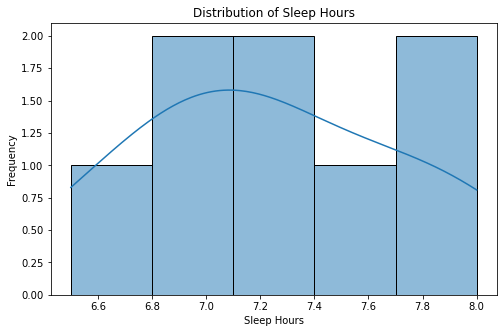

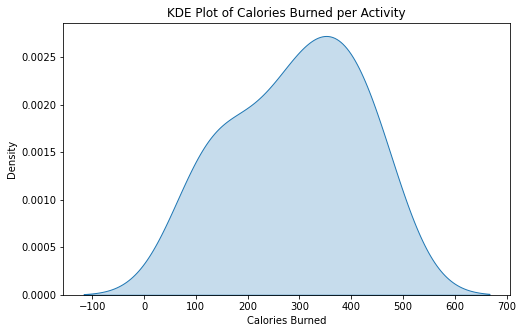

In [11]:
# Histogram of 'SleepHours' using Seaborn
plt.figure(figsize=(8, 5))
sns.histplot(data=fitness_df.drop_duplicates(subset=['Date']), x='SleepHours', bins=5, kde=True) # kde=True adds a Kernel Density Estimate line
plt.title('Distribution of Sleep Hours')
plt.xlabel('Sleep Hours')
plt.ylabel('Frequency')
plt.show()

# KDE plot of 'CaloriesBurned'
plt.figure(figsize=(8, 5))
sns.kdeplot(data=fitness_df, x='CaloriesBurned', fill=True)
plt.title('KDE Plot of Calories Burned per Activity')
plt.xlabel('Calories Burned')
plt.ylabel('Density')
plt.show()

**Exercise:**
1.  Create a `sns.histplot()` for the 'Steps' column. Experiment with different `bins` values.
2.  Try creating an `sns.kdeplot()` for the 'HeartRateAvg_bpm' column.

## 3.4 Categorical Plots for Comparing Activity Types

Seaborn provides excellent plots for visualizing the distribution of a numerical variable across different categories (e.g., comparing calories burned across different activity types).

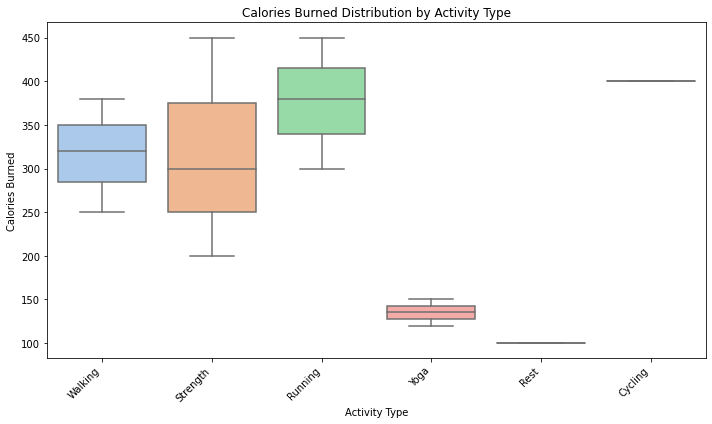

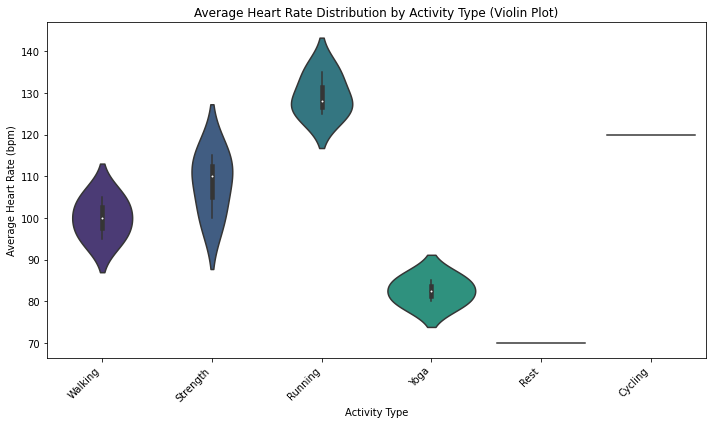

In [12]:
# Box plot of 'CaloriesBurned' by 'ActivityType'
plt.figure(figsize=(10, 6))
sns.boxplot(x='ActivityType', y='CaloriesBurned', data=fitness_df, palette='pastel')
plt.title('Calories Burned Distribution by Activity Type')
plt.xlabel('Activity Type')
plt.ylabel('Calories Burned')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Violin plot of 'HeartRateAvg_bpm' by 'ActivityType'
plt.figure(figsize=(10, 6))
sns.violinplot(x='ActivityType', y='HeartRateAvg_bpm', data=fitness_df, palette='viridis')
plt.title('Average Heart Rate Distribution by Activity Type (Violin Plot)')
plt.xlabel('Activity Type')
plt.ylabel('Average Heart Rate (bpm)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Exercise:**
1.  Create a `sns.barplot()` to show the average 'Duration_minutes' for each 'ActivityType'. Add a title and appropriate labels.

## Conclusion for Visualization Block 3

Fantastic work with Seaborn! You've seen how this library simplifies the creation of visually appealing and statistically informative plots for personal fitness data. It makes it easier to explore relationships between metrics, understand distributions, and compare different types of activities. You've now added powerful tools to your visualization toolkit.

In the final block, we'll cover how to arrange multiple plots in a single figure, fine-tune their appearance, and save your visualizations for personal review or sharing.